In [32]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from pathlib import Path

In [33]:
path = '../../parsers/official/data/club_stat.csv'
df = pd.read_csv(Path(path).resolve())
pd.set_option('display.max_columns', None)
df.head()

,season_id,name,club_name,club_shortName,club_abbr,club_id,teamType,shortName,id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
0,578,Arsenal,Arsenal,Arsenal,ARS,1.0,FIRST,Arsenal,1.0,7989.0,601.0,64.0,174.0,112.0,25.0,12.0,10463.0,152.0,21.0,187.0,150.0,198.0,726.0,18278.0,21.0,51.0,455.0,509.0,515.0,267.0,196.0,128.0,468.0,18

In [34]:
df['club_id'].unique()

array([  1.,   2., 127., 130., 131.,  43.,  46.,   4.,   6.,   7.,  34.,
       159.,  41.,   9.,  26.,  10., 163.,  11.,  12.,  13.,  23.,  14.,
        15.,  17.,  18.,  20.,  42.,  29.,  45.,  21.,  33.,  36.,  25.,
        38.])

In [35]:
#Удаляем колонки в которых информация дублируется либо информация бесполезна
df.drop(['name',
         'club_shortName',
         'shortName', 
         'id', 
         'teamType'], axis=1, inplace=True)

In [36]:
df.describe()

,season_id,club_id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,199.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0

In [37]:
import requests
a = '127.0.0.1:8501'
r = requests.get(f'http://5.104.75.226:5000')
r.status_code==200

True

In [38]:
df.shape

(200, 219)

In [39]:
id_season = {
        578: 2023,
        489: 2022,
        418: 2021,
        363: 2020,
        274: 2019,
        210: 2018,
        79: 2017,
        54: 2016,
        42: 2015,
        27: 2014,
        22: 2013,
        21: 2012,
        20: 2011,
        19: 2010,
        18: 2009,
        17: 2008,
        16: 2007,
        15: 2006,
        14: 2005,
        13: 2004,
        12: 2003,
        11: 2002,
        10: 2001,
        9: 2000,
        8: 1999,
        7: 1998,
        6: 1997,
        5: 1996,
        4: 1995,
        3: 1994,
        2: 1993,
        1: 1992
        }

In [40]:
df['season'] = df['season_id'].apply(lambda x: id_season[x])

In [41]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 220 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    season_id                       200 non-null    int64  
 1    club_name                       200 non-null    object 
 2    club_abbr                       200 non-null    object 
 3    club_id                         200 non-null    float64
 4    _accurate_back_zone_pass        200 non-null    float64
 5    _accurate_chipped_pass          200 non-null    float64
 6    _accurate_corners_intobox       200 non-null    float64
 7    _accurate_cross                 200 non-null    float64
 8    _accurate_cross_nocorner        200 non-null    float64
 9    _accurate_flick_on              200 non-null    float64
 10   _accurate_freekick_cross        200 non-null    float64
 11   _accurate_fwd_zone_pass         200 non-null    float64
 12   _accurate_goal_kicks

In [42]:
df['club_name'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Queens Park Rangers', 'Sheffield United',
       'Southampton', 'Stoke City', 'Sunderland', 'Swansea City',
       'Tottenham Hotspur', 'Watford', 'West Bromwich Albion',
       'West Ham United', 'Wolverhampton Wanderers'], dtype=object)

In [43]:
columns = list(df.columns)

In [44]:
columns

['season_id',
 'club_name',
 'club_abbr',
 'club_id',
 '_accurate_back_zone_pass',
 '_accurate_chipped_pass',
 '_accurate_corners_intobox',
 '_accurate_cross',
 '_accurate_cross_nocorner',
 '_accurate_flick_on',
 '_accurate_freekick_cross',
 '_accurate_fwd_zone_pass',
 '_accurate_goal_kicks',
 '_accurate_keeper_sweeper',
 '_accurate_keeper_throws',
 '_accurate_launches',
 '_accurate_layoffs',
 '_accurate_long_balls',
 '_accurate_pass',
 '_accurate_pull_back',
 '_accurate_through_ball',
 '_accurate_throws',
 '_aerial_lost',
 '_aerial_won',
 '_attempted_tackle_foul',
 '_attempts_conceded_ibox',
 '_attempts_conceded_obox',
 '_attempts_ibox',
 '_attempts_obox',
 '_att_assist_openplay',
 '_att_assist_setplay',
 '_att_bx_centre',
 '_att_bx_left',
 '_att_bx_right',
 '_att_cmiss_high',
 '_att_cmiss_left',
 '_att_cmiss_right',
 '_att_corner',
 '_att_fastbreak',
 '_att_goal_high_centre',
 '_att_goal_high_left',
 '_att_goal_high_right',
 '_att_goal_low_centre',
 '_att_goal_low_left',
 '_att_goal_

In [45]:
col_eda = [
        'season',
        'club_name',
        '_accurate_pass',
        '_accurate_goal_kicks',
        '_accurate_cross',
        '_aerial_lost',
        '_aerial_won',
        '_total_long_balls',
        '_total_offside',
        '_total_pass',
        '_total_cross',
        '_duel_lost',
        '_duel_won',
        '_saves',
        '_wins',
        '_draws',
        '_won_contest',
        '_won_corners',
        '_won_tackle',
        '_total_yel_card',
        '_keeper_throws',
        '_fwd_pass',
        '_goals',
        '_goals_conceded',
        '_goals_conceded_ibox',
        '_goals_openplay',
        '_goal_assist',
        '_goal_assist_intentional',
        '_goal_assist_openplay',
        '_goal_kicks',
        '_good_high_claim',
        '_blocked_cross',
        '_blocked_pass',
]

In [46]:
df_new = df[col_eda]

<Axes: >

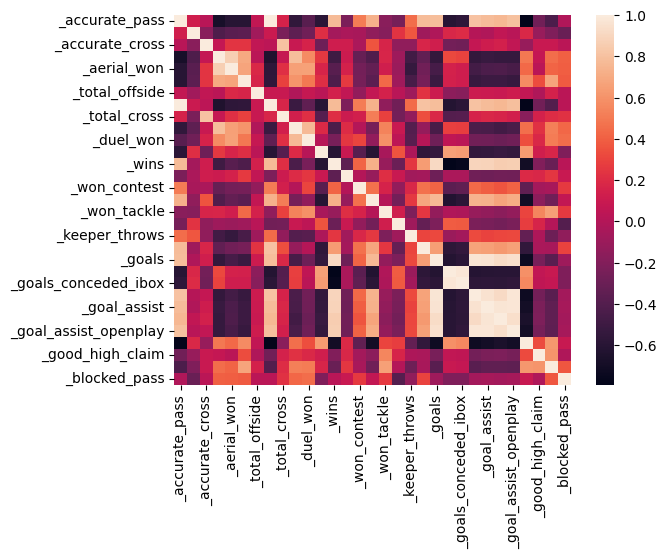

In [47]:
sns.heatmap(df_new.iloc[:, 2:].corr())

Больше всего нам интересны победы и голы, пусть они будут нашими целевыми признаками. Рассмотрим корреляцию других признаков к целевым

In [48]:
df_new.iloc[:, 2:].corr()[['_wins', '_goals']]

,_wins,_goals
_accurate_pass,0.773449,0.787628
_accurate_goal_kicks,-0.057931,-0.018134
_accurate_cross,0.120214,0.128039
_aerial_lost,-0.493045,-0.549539
_aerial_won,-0.381349,-0.460977
_total_long_balls,-0.422782,-0.514407
_total_offside,0.143438,0.105734
_total_pass,0.775713,0.786325
_total_cross,0.213907,0.184547
_duel_lost,-0.436108,-0.454833


Теперь возьмем полный датасет и посмотрим какие признаки наиболее зависимы и наименее, фильтровать будем по голам

In [49]:
#Значения нам нужны по модулю
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', key= lambda x: abs(x))[:20]

,_wins,_goals
_fk_foul_won,-0.038085,0.000451
_accurate_cross_nocorner,0.021807,0.003933
_shield_ball_oop,-0.040790,-0.006009
_second_yellow,-0.060831,0.007202
_last_man_tackle,-0.019712,0.012621
_accurate_goal_kicks,-0.057931,-0.018134
_ball_recovery,0.048919,-0.023578
_attempted_tackle_foul,-0.135614,-0.027109
_accurate_long_balls,0.134968,0.029781
_attendance_count,-0.011759,0.036834


In [50]:
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', ascending=False, key= lambda x: abs(x))[:20]


,_wins,_goals
_goals,0.909886,1.000000
_att_ibox_goal,0.903461,0.986232
_goals_openplay,0.888027,0.970159
_goal_assist,0.881776,0.964566
_goal_assist_openplay,0.866229,0.947237
_big_chance_scored,0.832664,0.934230
_goal_assist_intentional,0.859387,0.927380
_first_half_goals,0.855570,0.918244
_ontarget_scoring_att,0.845158,0.911209
_wins,1.000000,0.909886


Сгруппируем датасет по командам, берем среднее значение т.к. не все команды играли все сезоны

In [51]:
df_group = df_new.iloc[:, 1:].groupby(by='club_name', as_index=False).mean()

In [52]:
df_group.head()

,club_name,_accurate_pass,_accurate_goal_kicks,_accurate_cross,_aerial_lost,_aerial_won,_total_long_balls,_total_offside,_total_pass,_total_cross,_duel_lost,_duel_won,_saves,_wins,_draws,_won_contest,_won_corners,_won_tackle,_total_yel_card,_keeper_throws,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_openplay,_goal_assist,_goal_assist_intentional,_goal_assist_openplay,_goal_kicks,_good_high_claim,_blocked_cross,_blocked_pass
0,Arsenal,17387.100000,154.100000,152.700000,590.500000,568.400000,1861.500000,76.600000,20606.400000,692.100000,1930.300000,1966.200000,106.400000,21.300000,7.400000,389.300000,228.200000,392.900000,61.200000,198.200000,6625.000000,71.100000,42.500000,37.700000,50.200000,50.900000,40.300000,41.500000,253.000000,33.300000,64.100000,581.600000
1,Aston Villa,12518.857143,181.571429,160.285714,593.857143,603.000000,2197.285714,57.428571,15651.571429,717.285714,1945.142857,2015.571429,115.571429,12.714286,7.571429,343.714286,192.714286,376.285714,75.571429,166.714286,5530.285714,47.571429,58.142857,49.714286,31.714286,34.714286,27.000000,27.428571,291.285714,48.571429,83.714286,503.857143
2,Bournemouth,12204.428571,172.857143,149.000000,683.857143,641.000000,2210.857143,55.571429,15616.857143,652.142857,2104.714286,1988.000000,119.142857,11.428571,8.142857,357.857143,199.714286,381.285714,63.142857,195.142857,5877.000000,47.428571,66.857143,59.285714,29.857143,33.000000,25.142857,24.571429,313.571429,31.428571,89.000000,591.714286
3,Brentford,10944.333333,188.333333,175.000000,657.000000,677.333333,2290.000000,69.333333,14582.333333,669.000000,1898.666667,1945.666667,134.666667,12.666667,10.000000,257.333333,169.000000,359.333333,68.333333,160.000000,5831.333333,54.000000,55.666667,46.333333,33.000000,35.666667,28.666667,26.333333,297.666667,42.666667,63.000000,418.000000
4,Brighton and Hove Albion,15097.000000,187.571429,168.285714,573.428571,618.000000,2178.142857,74.000000,18402.714286,683.428571,1901.000000,1918.285714,104.428571,11.142857,12.142857,316.428571,194.142857,370.571429,62.857143,170.000000,6168.285714,45.285714,53.285714,46.714286,29.857143,30.142857,23.142857,24.000000,279.857143,27.857143,61.285714,550.714286


In [53]:
#Посмотрим на самые успешные команды за последние 10 лет по наибольшему количеству голов
df_group[['club_name', '_goals', '_wins']].sort_values(by='_goals', ascending=False)[:10]

,club_name,_goals,_wins
17,Manchester City,90.900000,26.800000
15,Liverpool,77.400000,23.000000
0,Arsenal,71.100000,21.300000
29,Tottenham Hotspur,69.600000,20.400000
7,Chelsea,66.000000,19.900000
18,Manchester United,60.900000,19.700000
14,Leicester City,57.444444,14.888889
3,Brentford,54.000000,12.666667
32,West Ham United,52.900000,13.500000
16,Luton Town,52.000000,6.000000


<Axes: xlabel='_goals', ylabel='Count'>

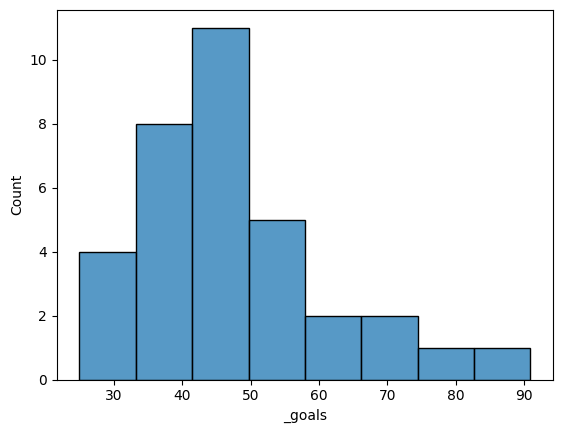

In [54]:
sns.histplot(df_group['_goals'])

<Axes: xlabel='_wins', ylabel='Count'>

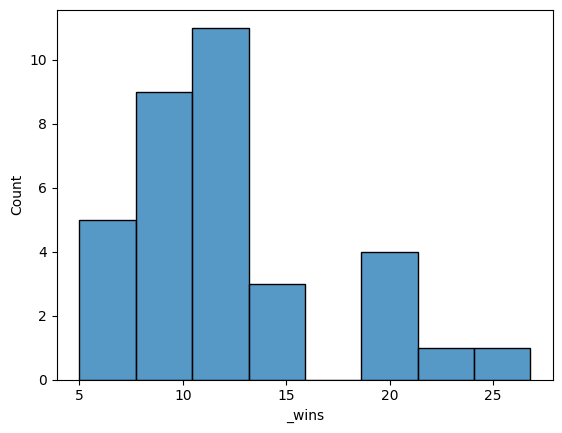

In [55]:
sns.histplot(df_group['_wins'])

<Axes: xlabel='_draws', ylabel='Count'>

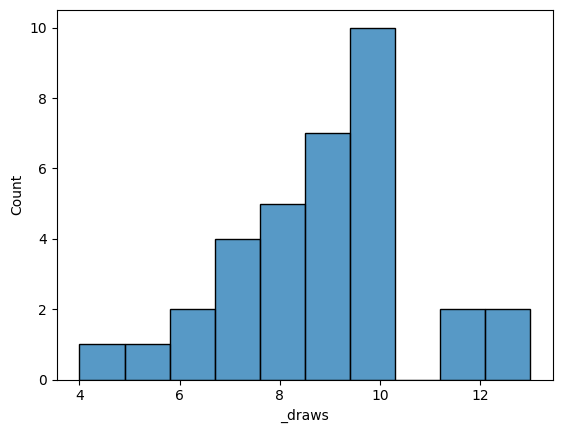

In [56]:
sns.histplot(df_group['_draws'])

In [57]:
df_new.shape

(200, 33)

In [58]:
df_new

,season,club_name,_accurate_pass,_accurate_goal_kicks,_accurate_cross,_aerial_lost,_aerial_won,_total_long_balls,_total_offside,_total_pass,_total_cross,_duel_lost,_duel_won,_saves,_wins,_draws,_won_contest,_won_corners,_won_tackle,_total_yel_card,_keeper_throws,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_openplay,_goal_assist,_goal_assist_intentional,_goal_assist_openplay,_goal_kicks,_good_high_claim,_blocked_cross,_blocked_pass
0,2023,Arsenal,18278.0,152.0,174.0,509.0,515.0,1554.0,87.0,21052.0,670.0,1815.0,1791.0,55.0,28.0,5.0,283.0,266.0,348.0,62.0,189.0,6373.0,91.0,29.0,25.0,56.0,62.0,49.0,48.0,195.0,42.0,39.0,306.0
1,2022,Arsenal,17458.0,113.0,138.0,564.0,490.0,1721.0,56.0,20450.0,674.0,1840.0,1846.0,95.0,26.0,6.0,357.0,223.0,343.0,52.0,174.0,6354.0,88.0,43.0,36.0,66.0,64.0,49.0,55.0,185.0,17.0,46.0,301.0
2,2021,Arsenal,15254.0,132.0,149.0,577.0,470.0,1865.0,66.0,18290.0,633.0,1778.0,1678.0,100.0,22.0,3.0,319.0,209.0,311.0,60.0,175.0,5836.0,61.0,48.0,42.0,39.0,42.0,29.0,31.0,251.0,29.0,39.0,561.0
3,2020,Arsenal,17118.0,142.0,161.0,604.0,515.0,1850.0,61.0,20126.0,751.0,1763.0,1656.0,96.0,18.0,7.0,296.0,208.0,252.0,47.0,206.0,6007.0,55.0,39.0,35.0,42.0,39.0,31.0,35.0,238.0,23.0,42.0,566.0
4,2019,Arsenal,15582.0,221.0,141.0,599.0,513.0,1983.0,73.0,18649.0,699.0,2016.0,1934.0,147.0,14.0,14.0,411.0,232.0,336.0,86.0,233.0,5822.0,56.0,48.0,44.0,41.0,35.0,28.0,29.0,314.0,25.0,69.0,577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2022,Wolverhampton Wanderers,13590.0,161.0,156.0,543.0,468.0,2152.0,62.0,16712.0,661.0,1947.0,1899.0,119.0,11.0,8.0,385.0,186.0,370.0,84.0,196.0,5549.0,31.0,58.0,51.0,19.0,12.0,10.0,9.0,283.0,43.0,46.0,393.0
196,2021,Wolverhampton Wanderers,14236.0,200.0,137.0,494.0,465.0,2245.0,61.0,17517.0,587.0,1906.0,1919.0,125.0,15.0,6.0,450.0,168.0,377.0,59.0,220.0,5795.0,38.0,43.0,37.0,24.0,22.0,19.0,16.0,275.0,42.0,69.0,630.0
197,2020,Wolverhampton Wanderers,14570.0,196.0,171.0,608.0,581.0,2186.0,38.0,17522.0,775.0,1959.0,2015.0,103.0,12.0,9.0,468.0,209.0,335.0,53.0,156.0,5594.0,36.0,52.0,49.0,21.0,21.0,16.0,13.0,275.0,22.0,57.0,578.0
198,2019,Wolverhampton Wanderers,13286.0,171.0,177.0,719.0,788.0,2562.0,49.0,16764.0,718.0,2140.0,2289.0,91.0,15.0,14.0,509.0,193.0,367.0,57.0,127.0,5956.0,52.0,40.0,37.0,34.0,36.0,30.0,26.0,283.0,19.0,55.0,592.0


Рассмотрим совместное распределение признаков между собой 

In [59]:
df_new.iloc[:,5:8]

,_aerial_lost,_aerial_won,_total_long_balls
0,509.0,515.0,1554.0
1,564.0,490.0,1721.0
2,577.0,470.0,1865.0
3,604.0,515.0,1850.0
4,599.0,513.0,1983.0
...,...,...,...
195,543.0,468.0,2152.0
196,494.0,465.0,2245.0
197,608.0,581.0,2186.0
198,719.0,788.0,2562.0


In [60]:
sns.__version__

'0.13.2'

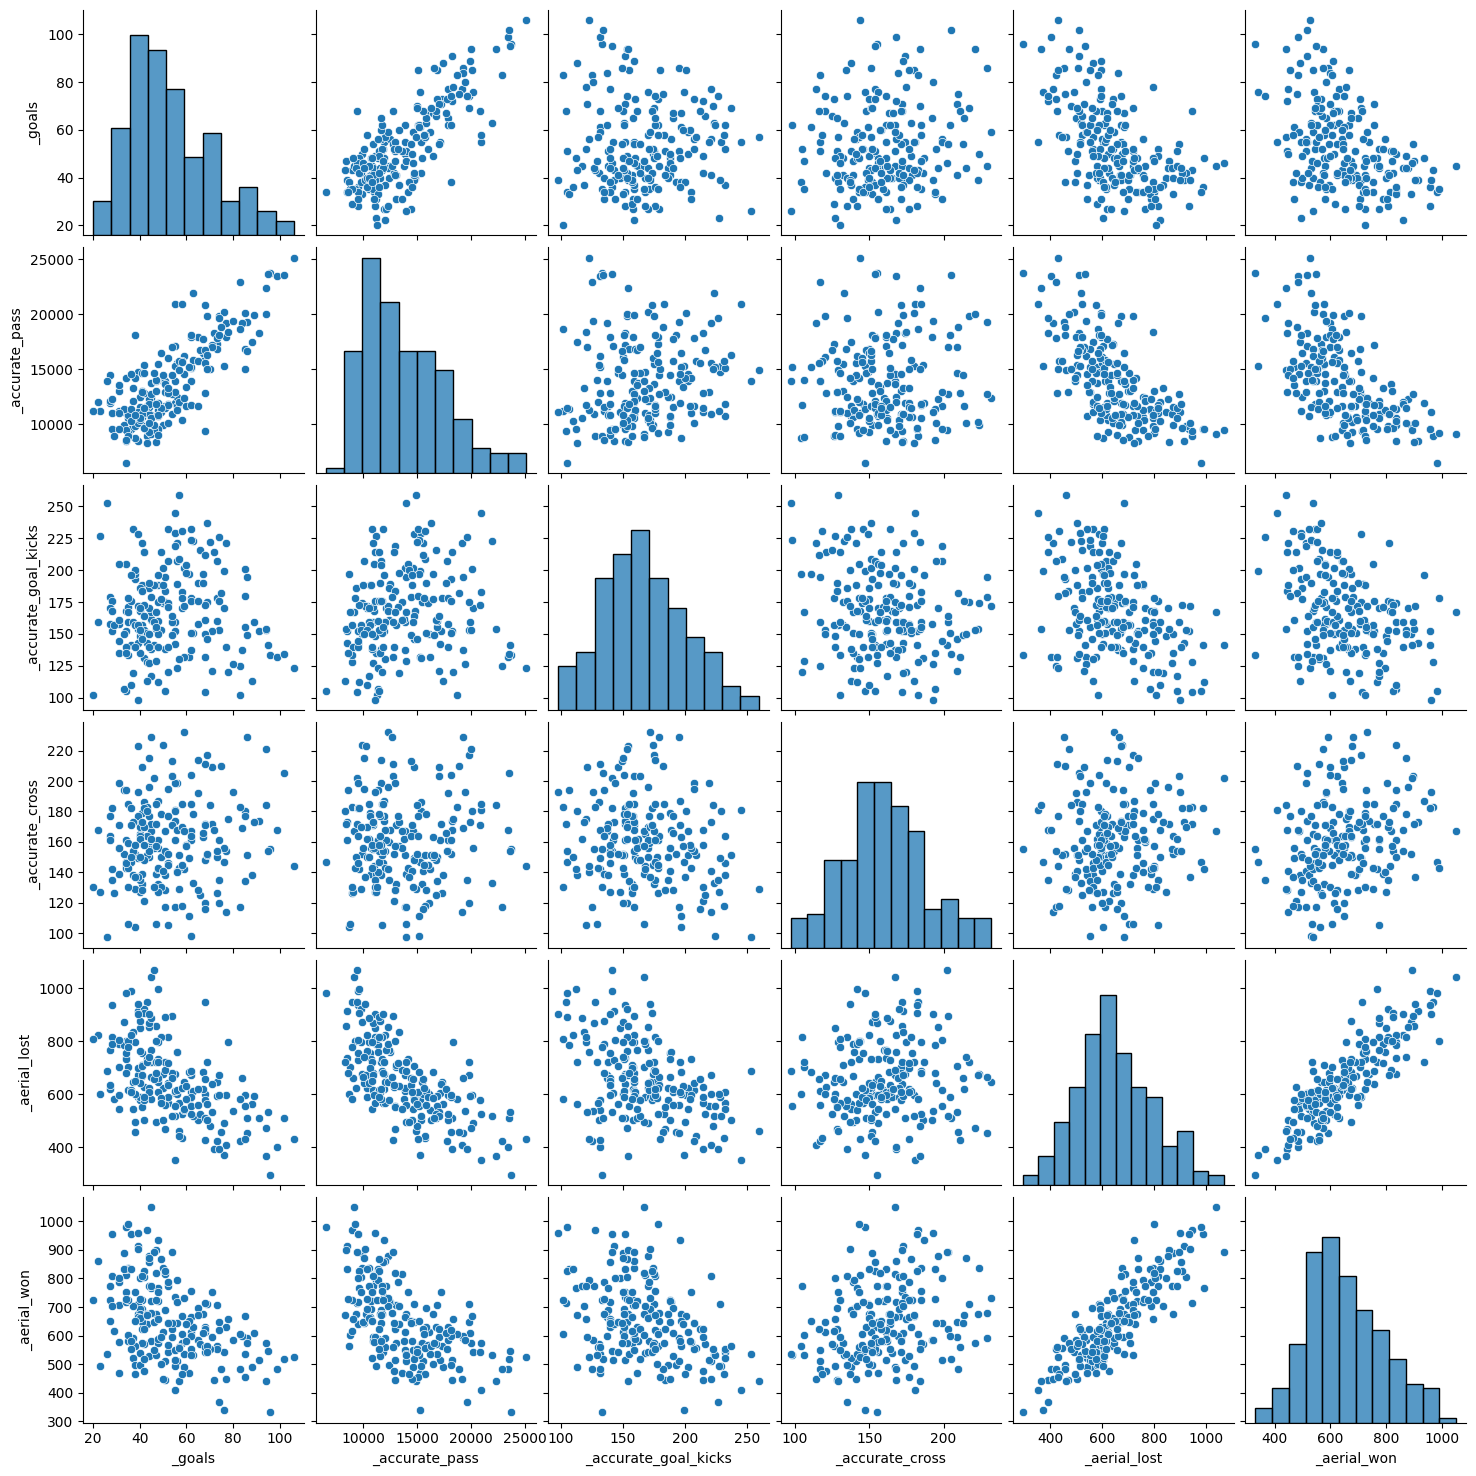

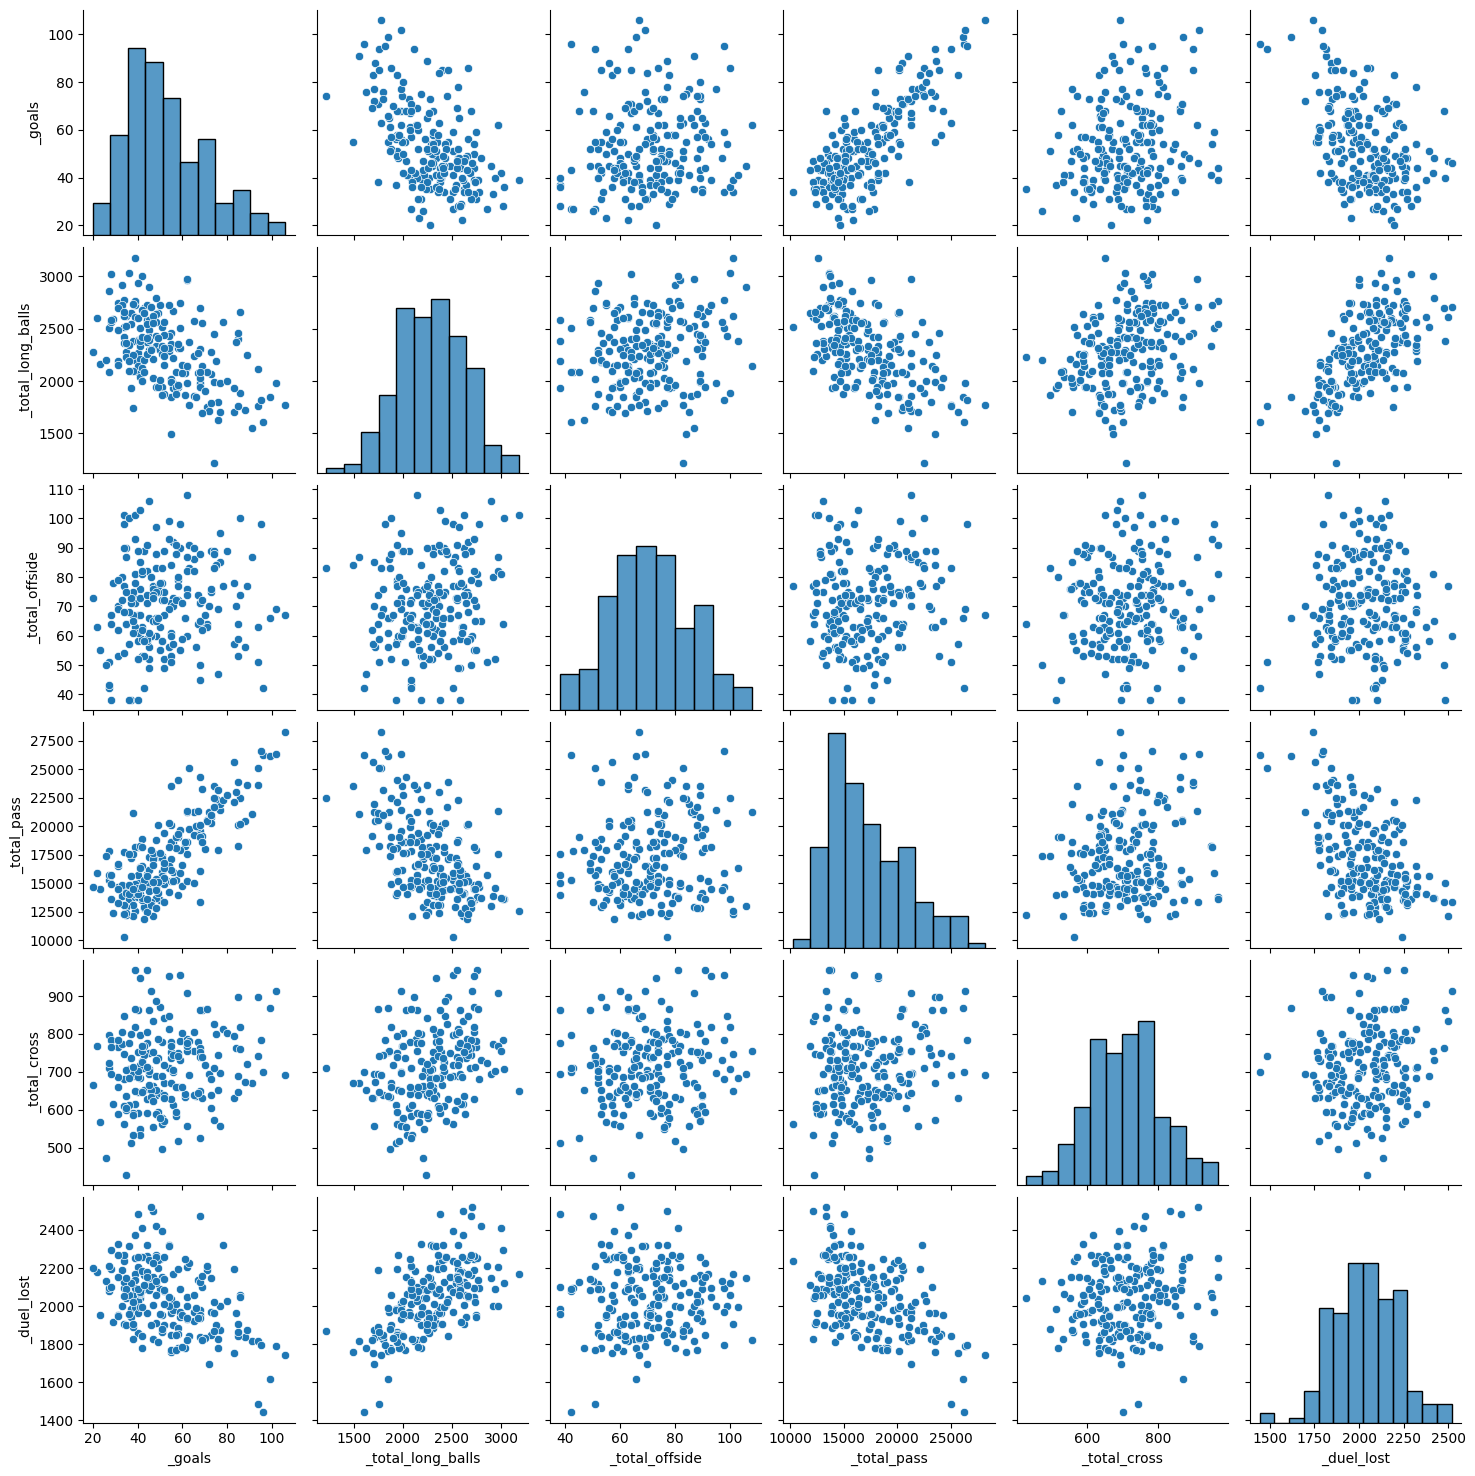

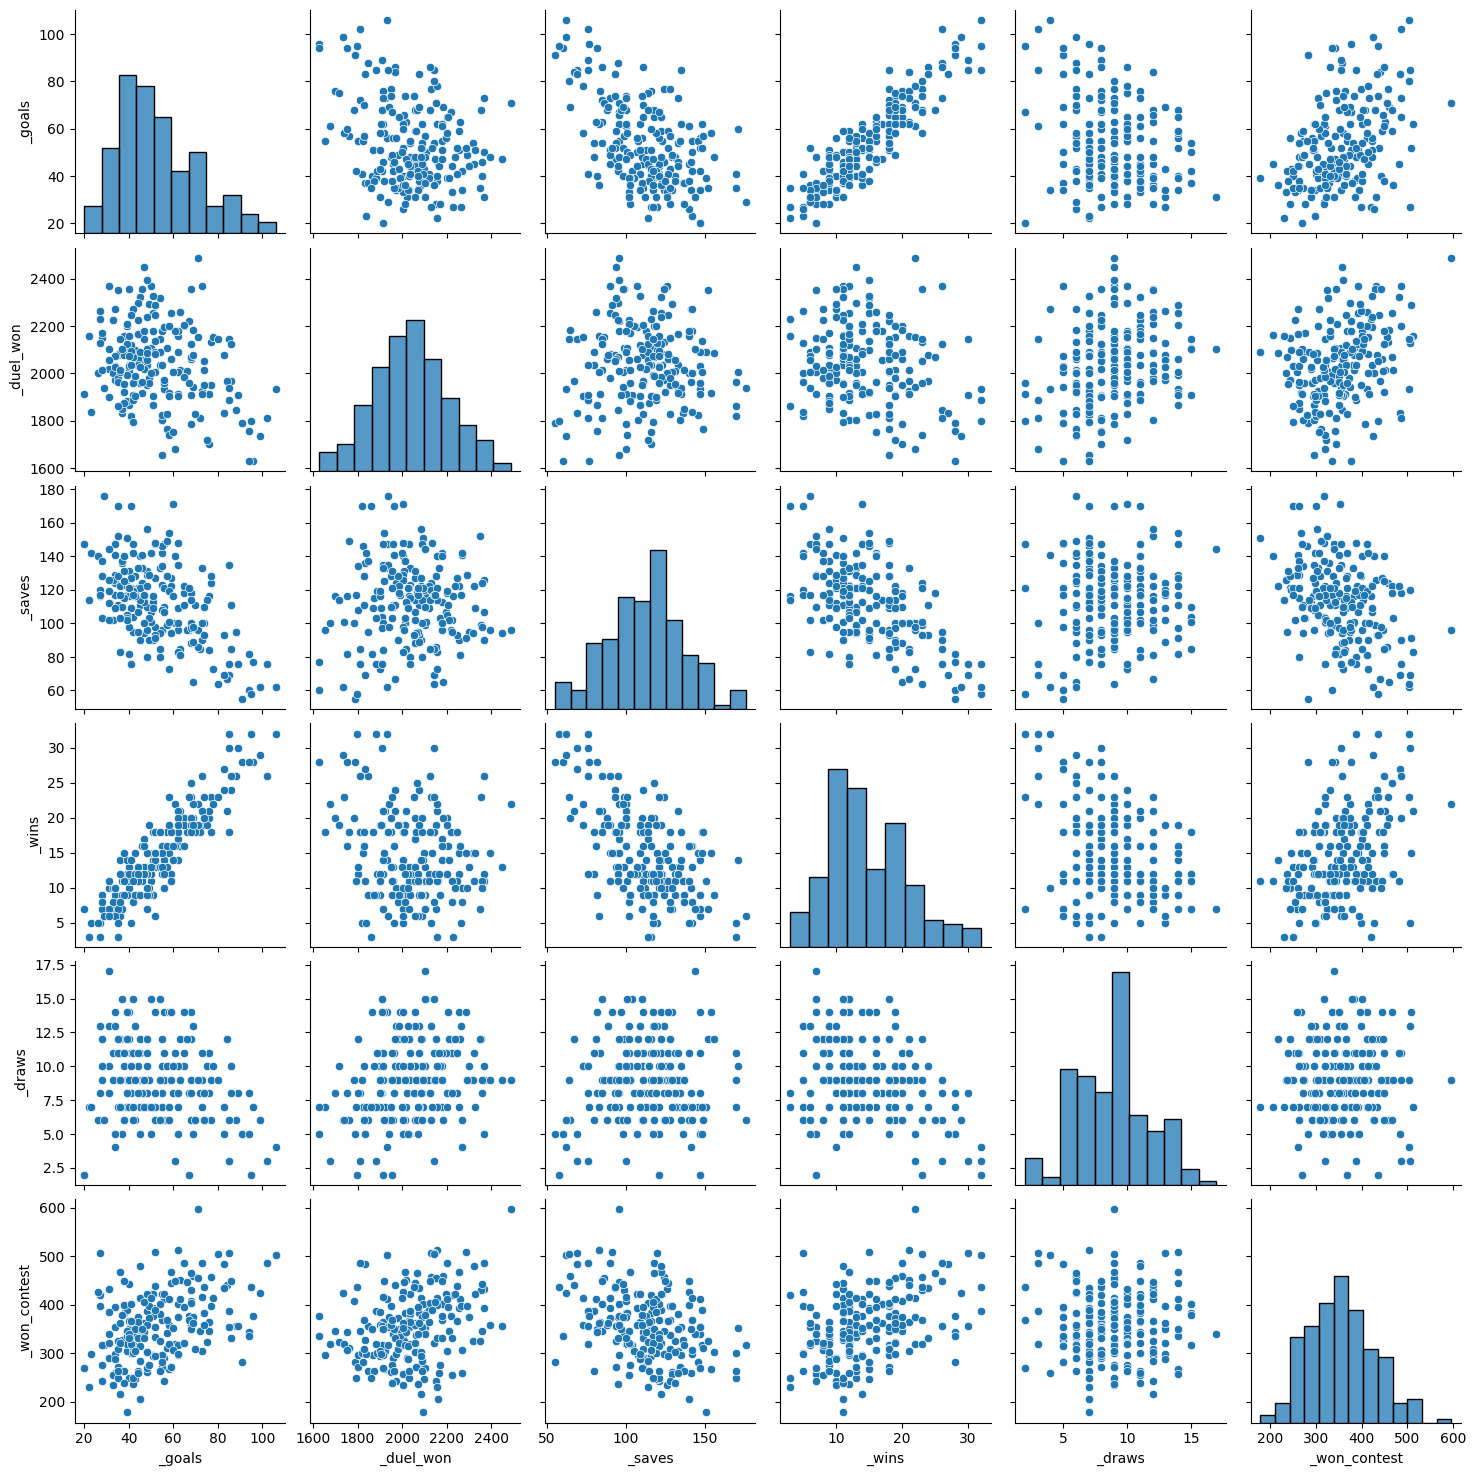

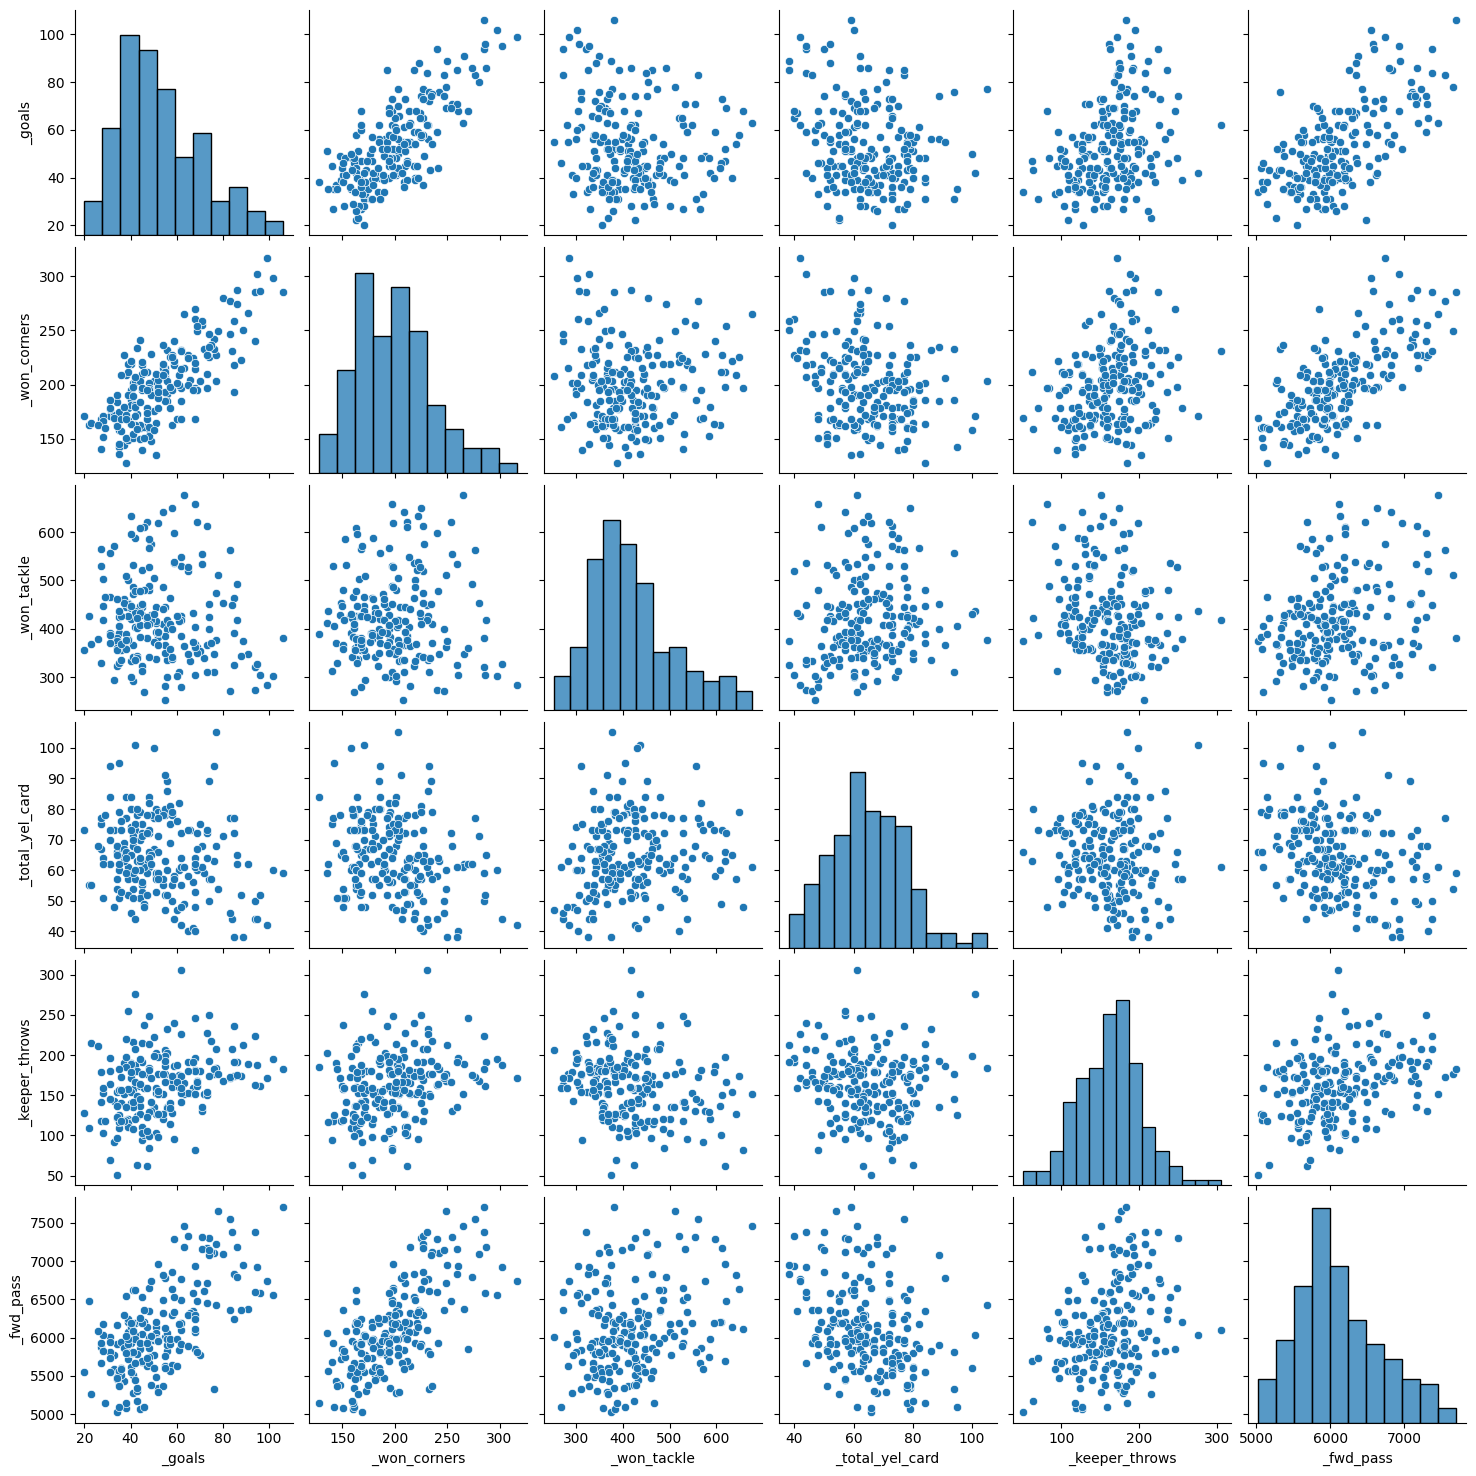

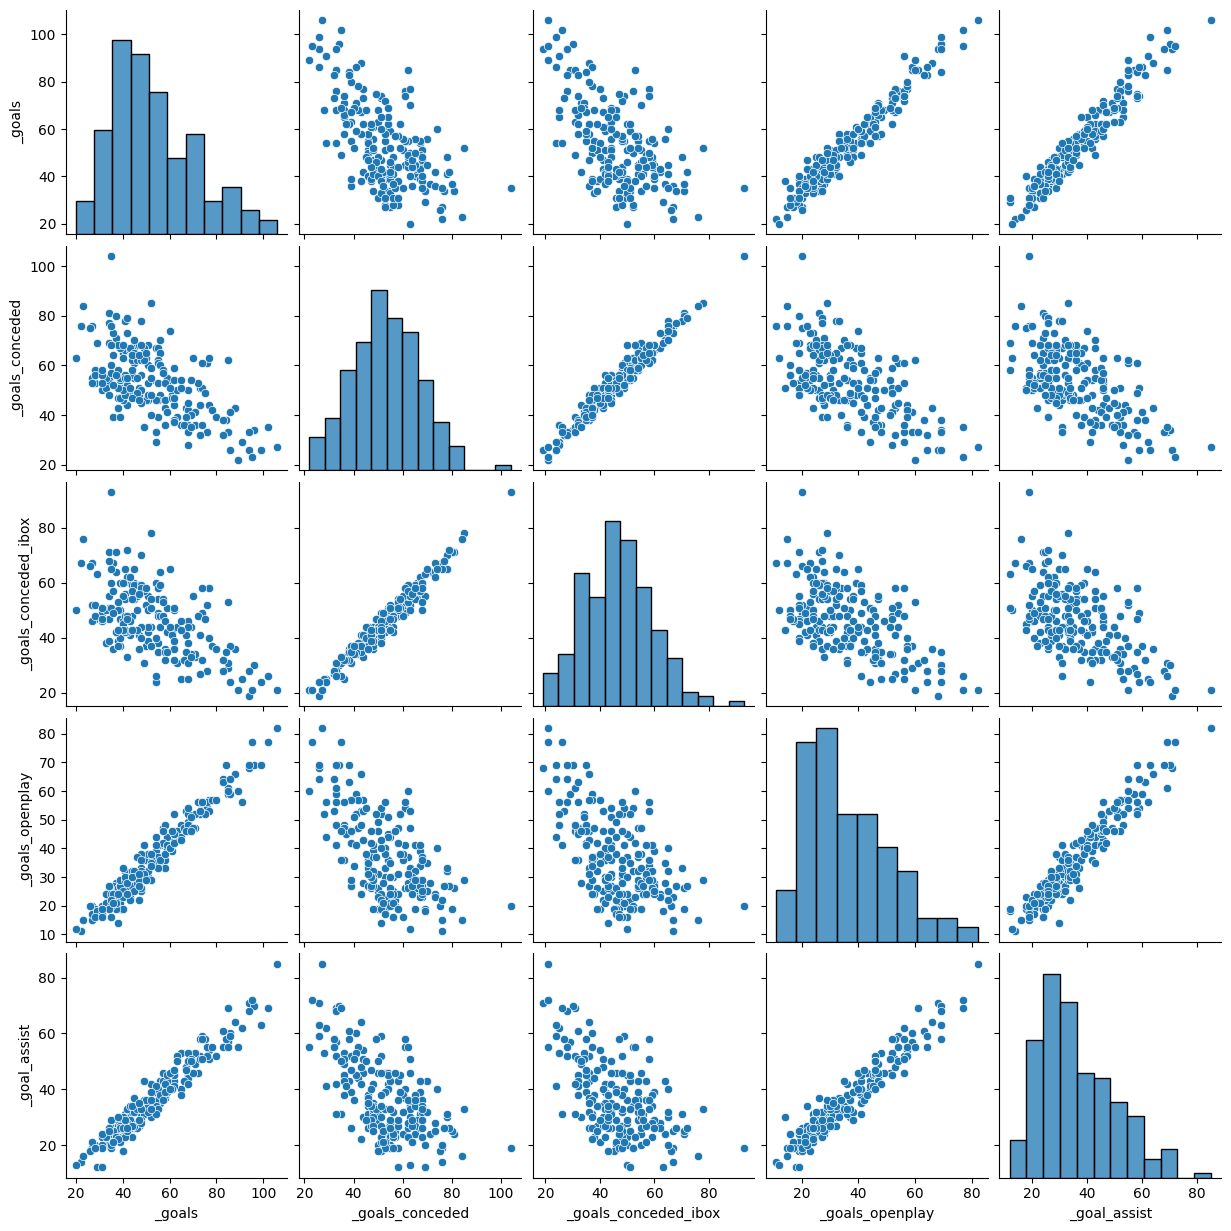

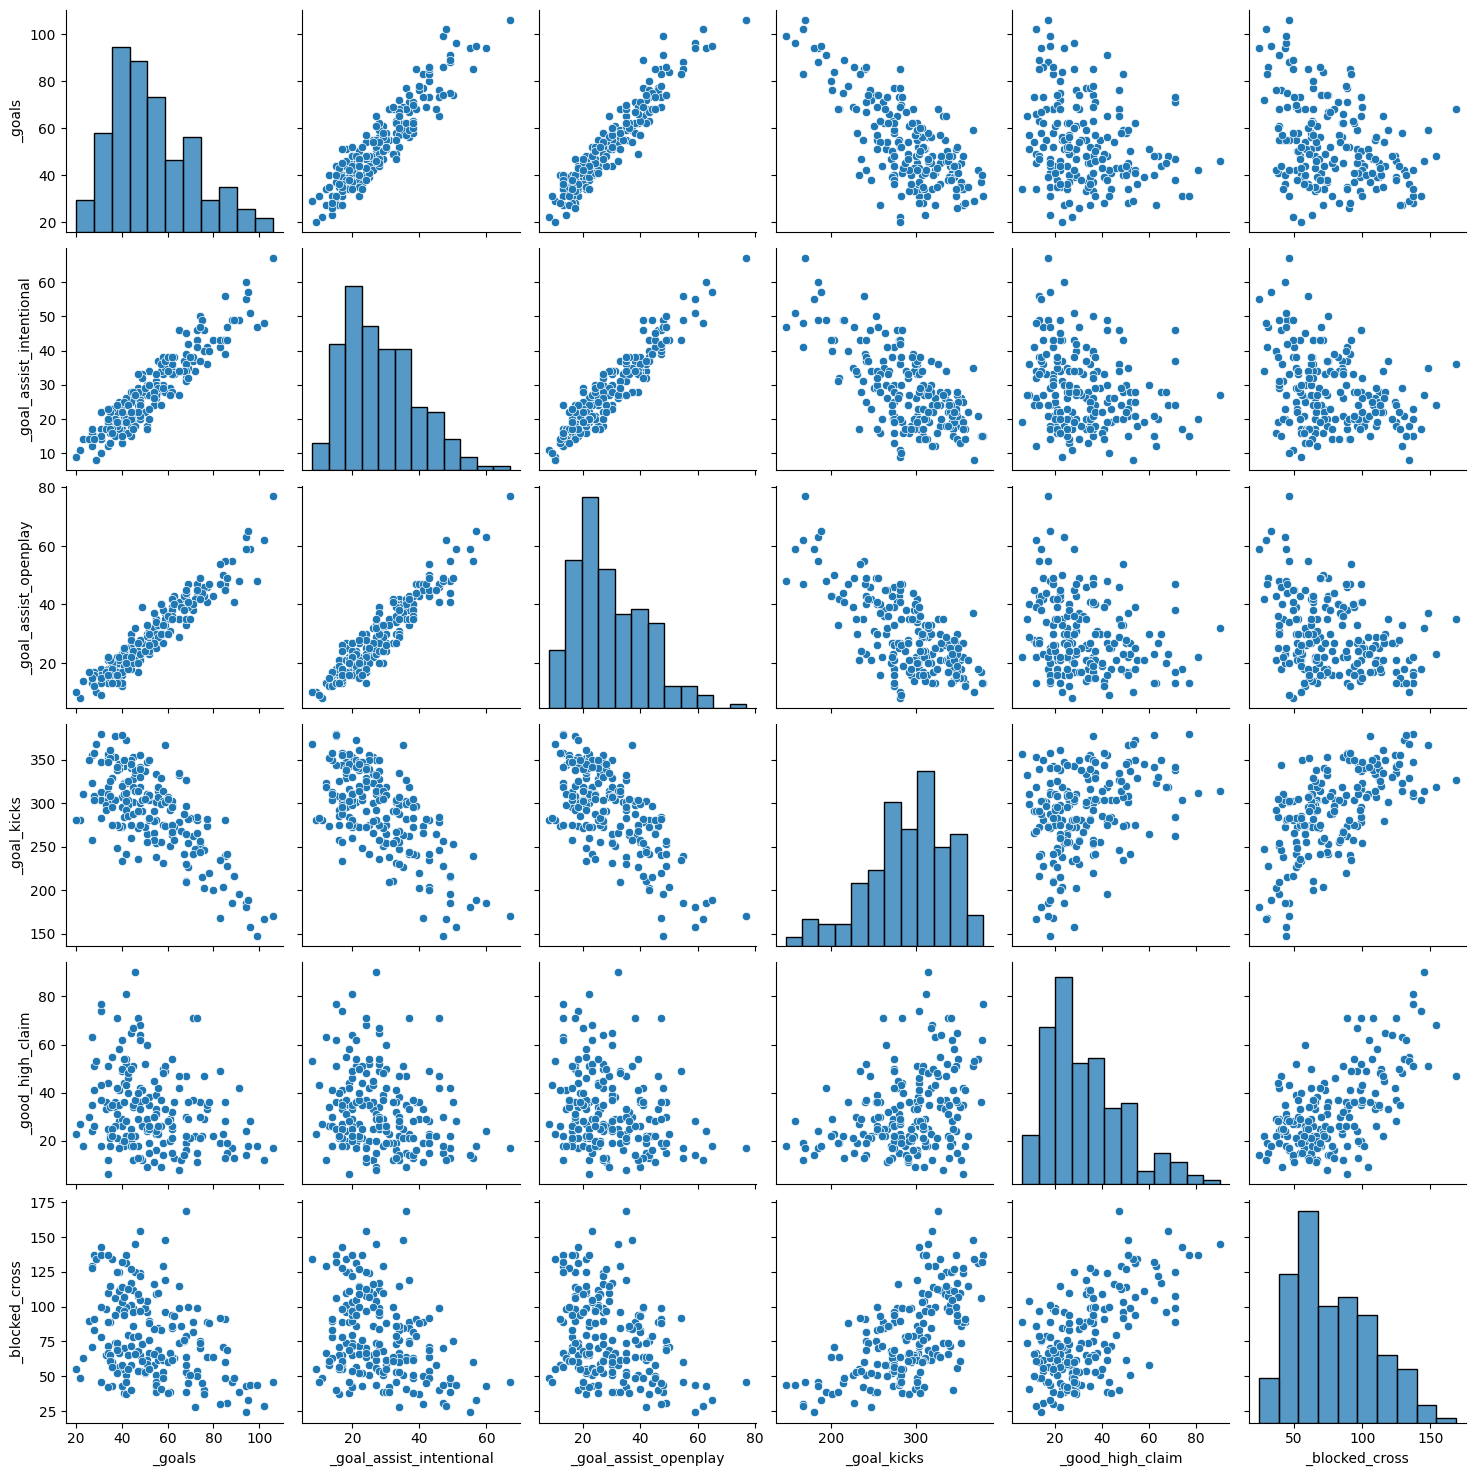

In [61]:
n = 5
target_id = 22  # _goals

for col in range(2, df_new.shape[1] - n, n):
    indices = [target_id] + list(range(col, col + n))
    
    if target_id in range(col, col + n):
        indices.remove(target_id)

    sns.pairplot(df_new.iloc[:, indices])

In [62]:
df.to_csv(Path('eda_data/clubs_stat.csv').resolve(), index=False)